In [1]:
import os 
import numpy as np

In [2]:
is_init = False
print(os.listdir('Data'))
for dir in os.listdir('Data'):
	for i in os.listdir('Data/'+dir):
		if(i.split('.')[-1] == 'npy'):
			if(not is_init):
				is_init = True
				X = np.load('Data/' + dir + '/' +i)
				size = X.shape[0]
				y = np.array([dir]*size) 
			else:
				x = np.load('Data/' + dir + '/' +i)
				size = x.shape[0]
				X = np.concatenate((X , x),axis=0)
				y = np.concatenate((y,np.array([(dir)]*size)),axis=0)
print(X.shape,y.shape)

['Angry', 'Happy', 'Love', 'Neutral', 'Rock', 'Sad']
(26157, 1020) (26157,)


In [3]:
print(y)

['Angry' 'Angry' 'Angry' ... 'Sad' 'Sad' 'Sad']


In [4]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
y = lc.fit_transform(y)
labels = lc.classes_
print(labels)
print(y)

['Angry' 'Happy' 'Love' 'Neutral' 'Rock' 'Sad']
[0 0 0 ... 5 5 5]


In [5]:
# one hot encode y
from keras.utils import to_categorical
y = to_categorical(y)
print(y.shape)

(26157, 6)


In [6]:
num_rows = X.shape[0]
shuffled_indices = np.random.permutation(num_rows)
X = X[shuffled_indices]
y = y[shuffled_indices]
print(X.shape)

(26157, 1020)


In [7]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
from keras.models import Sequential
from keras.layers import Dense , Dropout

from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=1, factor=0.5, min_lr=0.00001)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping, lr_reduction])

C:\Users\Pranav\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
524/524 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.5099 - loss: 1.2423 - val_accuracy: 0.7823 - val_loss: 0.7609 - learning_rate: 0.0010
Epoch 2/100
524/524 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.7689 - loss: 0.6863 - val_accuracy: 0.6260 - val_loss: 0.9955 - learning_rate: 0.0010
Epoch 3/100
524/524 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8128 - loss: 0.5631 - val_accuracy: 0.7814 - val_loss: 0.6490 - learning_rate: 0.0010
Epoch 4/100
524/524 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8372 - loss: 0.4929 - val_accuracy: 0.7415 - val_loss: 0.7617 - learning_rate: 0.0010
Epoch 5/100
524/524 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8456 - loss: 0.4745 - val_accuracy: 0.8043 - val_loss: 0.5523 - learning_rate: 0.0010
Epoch 6/100
524/524 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.8543 - loss: 0.4302 - val_accuracy: 0.7517 - val_loss: 0.6965 - learning_rate: 0.0010
Epoch 7/100
524/524 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.863

In [9]:
y_pred = model.predict(X_test)
y_temp = np.zeros([y_test.shape[0] , y_test.shape[1]] , dtype=int)
for i in range(y_pred.shape[0]):
	y_temp[i][np.argmax(y_pred[i])] = 1
y_pred = y_temp

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [10]:
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
print("Classification Report")
print(classification_report(y_test, y_pred, target_names=labels))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Classification Report
              precision    recall  f1-score   support

       Angry       0.97      0.96      0.97       852
       Happy       0.96      0.97      0.97       885
        Love       0.99      0.95      0.97       798
     Neutral       0.95      0.99      0.97      1224
        Rock       0.99      0.95      0.97       907
         Sad       0.98      0.98      0.98       566

   micro avg       0.97      0.97      0.97      5232
   macro avg       0.97      0.97      0.97      5232
weighted avg       0.97      0.97      0.97      5232
 samples avg       0.97      0.97      0.97      5232

Accuracy: 0.9701834862385321


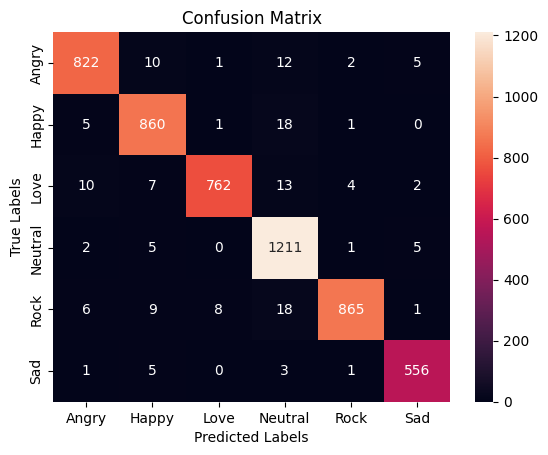

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# Create a heatmap with labels
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)

# Set the title and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Display the plot
plt.show()

In [12]:
model.save('Models/model.h5')
np.save('Models/labels.npy',labels)

In [13]:
print(X.shape , X_train.shape , X_test.shape)

(26157, 1020) (20925, 1020) (5232, 1020)
